In [1]:
import os
import subprocess
import torch
from matplotlib import pyplot as plt
import gymnasium as gym
import numpy as np
import pandas as pd

In [2]:
env_file = 'model_downloader.py'
env_url = "https://raw.githubusercontent.com/alibaniasad1999/master-thesis/main/Code/Python/utils/model_downloader.py"

if not os.path.isfile(env_file):
    print(f"Downloading {env_file} ...")
    subprocess.run(
        ['wget', '-q', '-O', env_file, env_url],
        stdout=subprocess.DEVNULL,
        stderr=subprocess.DEVNULL
    )
    print(f"{env_file} downloaded.")
else:
    print(f"{env_file} already exists.")

from model_downloader import download_file, download_everything

trajectory = download_everything('ppo, TBP')

model_downloader.py already exists.
trajectory.csv already exists.
Trajectory head:
   0.87018  -0.059444  0  -0.010472  -0.17514  0.1
0  0.87018  -0.059540  0  -0.010536  -0.17494    0
1  0.87017  -0.059636  0  -0.010600  -0.17474    0
2  0.87017  -0.059732  0  -0.010664  -0.17454    0
3  0.87016  -0.059828  0  -0.010728  -0.17434    0
4  0.87015  -0.059924  0  -0.010793  -0.17414    0
Data shape: (9999, 6)
TBP.py already exists.
PPO.py already exists.


In [3]:
import PPO

Directory 'utils' already exists.


In [4]:
from PPO import PPO
from TBP import ThreeBodyEnv
from utils.run_utils import setup_logger_kwargs

trajectory.csv already exists.


Logging data to /Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/TBP/PPO/sand_box/data/PPO_3BP/PPO_3BP_s0/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "hidden_sizes":	[
            32,
            32
        ]
    },
    "clip_ratio":	0.2,
    "env":	{
        "<ThreeBodyEnv instance>":	{
            "action_space":	{
                "Box(-4.0, 4.0, (2,), float32)":	{
                    "_np_random":	null,
                    "_shape":	[
                        2
                    ],
                    "bounded_above":	"[ True  True]",
                    "bounded_below":	"[ True  True]",
                    "dtype":	"float32",
                    "high":	"[4. 4.]",
                    "high_repr":	"4.0",
                    "low":	"[-4. -4.]",
                    "low_repr":	"-4.0"
                }
            },
            "dt":	0.001,
            "error_range":	0.01,
            "final_range":	0.001,
            "max_steps":	6000,
            "mu":	0.0122

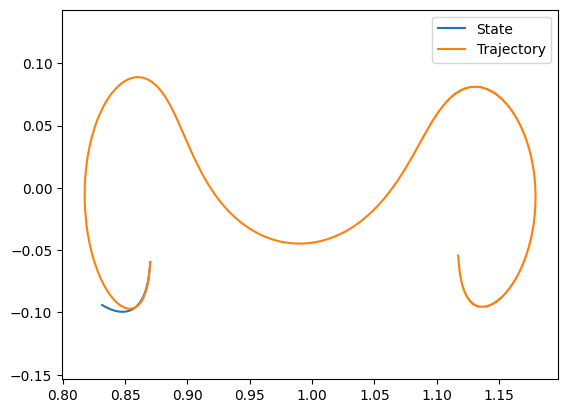

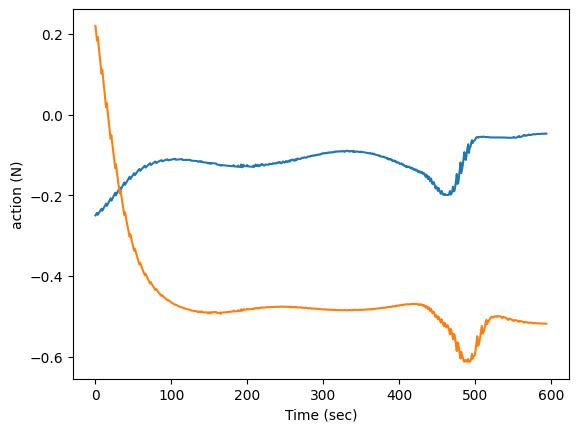

In [5]:
# Define constants
HID = 32
L = 2
GAMMA = 0.99
SEED = 0
STEPS = 10000
EPOCHS = 100
EXP_NAME = 'PPO_3BP'
ac_kwargs = dict(hidden_sizes=[HID] * L)
# Use the constants directly


logger_kwargs = setup_logger_kwargs(EXP_NAME, SEED)

ppo = PPO(ThreeBodyEnv(trajectory, error_range=0.01, final_range=0.001), ac_kwargs=ac_kwargs, gamma=GAMMA,
            seed=SEED, steps_per_epoch=STEPS, logger_kwargs=logger_kwargs)
# test PPO agent (not trained)
ppo.test(deterministic=True)

In [6]:
ppo.save()

Model saved successfully! 🥰😎


In [7]:
ppo.load()

Model loaded successfully and device is cpu! 🥰😎


In [8]:
ppo.train()

[-0.00776    -0.00634075 -0.04301743 -0.01882676]
idx 0.01139 state 0.04801425621269205
too much error 🥲😱
second player was in the game
[-0.00776    -0.00634075 -0.04301743 -0.01882676]
idx 0.01139 state 0.04801425621269205
too much error 🥲😱
second player was in the game
[-0.00776    -0.00634075 -0.04301743 -0.01882676]
idx 0.01139 state 0.04801425621269205
too much error 🥲😱
second player was in the game
[-0.00776    -0.00634075 -0.04301743 -0.01882676]
idx 0.01139 state 0.04801425621269205
too much error 🥲😱
second player was in the game
[-0.00776    -0.00634075 -0.04301743 -0.01882676]
idx 0.01139 state 0.04801425621269205
too much error 🥲😱
second player was in the game
[-0.00776    -0.00634075 -0.04301743 -0.01882676]
idx 0.01139 state 0.04801425621269205
too much error 🥲😱
second player was in the game
[-0.00776    -0.00634075 -0.04301743 -0.01882676]
idx 0.01139 state 0.04801425621269205
too much error 🥲😱
second player was in the game
[-0.00776    -0.00634075 -0.04301743 -0.01882676

KeyboardInterrupt: 